In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,20)

In [6]:
hf_higgs= h5py.File('higgs_100000_pt_250_500.h5', 'r')
hf_qcd = h5py.File('qcd_100000_pt_250_500.h5', 'r')

with h5py.File('qcd_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

with h5py.File('higgs_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

qcd_100000_pt_250_500
higgs_100000_pt_250_500


In [7]:
higgs_data = np.array(hf_higgs.get('higgs_100000_pt_250_500'))
qcd_background_data = np.array(hf_qcd.get('qcd_100000_pt_250_500'))
higgs_data

array([[ 4.72074292e+02,  1.37051933e-01, -2.53514528e+00, ...,
         3.83473901e-01,  6.16674158e-01,  5.57406805e-01],
       [ 4.70405678e+02, -3.91569464e-02,  6.96687614e-02, ...,
         3.13239811e-01,  8.25308189e-01,  7.04650207e-01],
       [ 4.38008357e+02, -1.81138694e-01, -3.03108291e+00, ...,
         4.39916683e-01,  4.96338176e-01,  4.87496134e-01],
       ...,
       [ 4.66920808e+02, -8.05493156e-01, -7.54702707e-01, ...,
         6.57692767e-01,  6.96196368e-01,  1.80727311e-02],
       [ 4.71611853e+02,  8.01812583e-01, -3.07788313e+00, ...,
         4.19343355e-01,  8.60960496e-01,  6.41891786e-01],
       [ 4.67029906e+02, -4.32315077e-01,  2.48393869e+00, ...,
         5.58198696e-01,  8.95642894e-01,  8.55158017e-01]])

In [8]:
## look into the paper for the higgs paper, click on tables, it will direct you to a table, for a lot of them for the parameters, explainations of what params mean in class
## Plot histograms of background, and actual data, to see differences
## Next step if there is correlation 
higgs_data_1 = pd.DataFrame(data=higgs_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
qcd_background_data_1 = pd.DataFrame(data=qcd_background_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])

#for i in range(0,14):
#    higgs_data_1.iloc[:,i] = higgs_data[:,i]
#    qcd_background_data_1.iloc[:,i] = qcd_background_data[:,i]

higgs_data = higgs_data_1
qcd_background_data = qcd_background_data_1

I am given 14 variables related to the meta-data of the hig. I will try to explain it all the variables here to help provide a better understanding of their purpose within the meta-deta. 

pt: $p_{\tau}$, the measured transverse momentum which is associated with the mass measured. 

eta: $\eta$, Also known as pseudorapidity. This is a coordinate value which a function of $\theta$ which varies depending on the beam. The function is equal to zero when it is perperndicular to the beam and $\infty$ or $-\infty$ along the transverse axis. 

phi: $\phi$, This is a coordinate value that spans between $-\pi$ and $\pi$ which determines the radial location of a detection 

d2: D$^{\beta = 1}_2$, An energy correlation funciton that is usedful for different jet substructures. This is equal to $E_{CF3} \cdot (\frac{E_{CF1}}{E_{CF2}})$

EE2 and EE3: Energy Correlation functions that compare QCD data from bosons. Derived from the enegeries of different  

mass: $M_T$, Higgs has a peak transverse mass of around 125.09 GeV. 

angularity: Describes the symmetry of energy flow in the jet. Can be represented as two-body kinematics depending on the tail-side of the flow. 

sub-jettiness: $\tau_n$, The spread of the jet when divided into n sub-jets

sub-jetiness ratio: $\tau_{mn}$, $\frac{\tau_m}{\tau_n}$ or $\frac{\tau_m}{\tau_{m-1}}$ 

KtDeltaR: $k_T \Delta R$, size parameter related to the cone based on the jet projection

In [20]:
higgs_data

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [21]:
qcd_background_data

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


## Understanding the meta-data via different plots 

(0.0, 0.05)

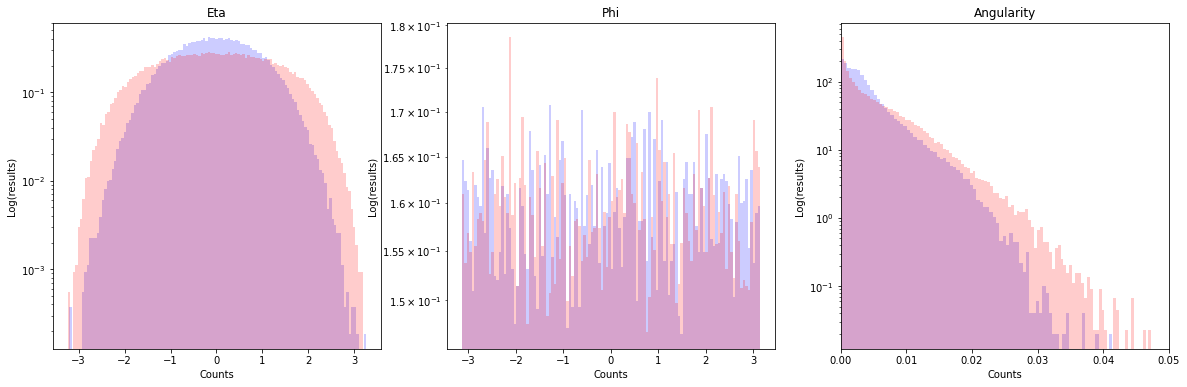

In [22]:
# Blue represents the higgs data, which is our signal data
# Red represents the background data generated
# The purple cover represents the overlap between the two

bins = 120; alph = .2 
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (20, 6))
ax.hist(higgs_data['eta'], bins, alpha = alph, density = True, color='b')
ax.hist(qcd_background_data['eta'], bins, alpha = alph, density = True, color='r')
ax.set_yscale('log')
ax.set_title('Eta'); 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(results)')

ax1.hist(higgs_data['phi'], bins, alpha = alph, density = True, color='b')
ax1.hist(qcd_background_data['phi'], bins, alpha = alph, density = True, color='r')
ax1.set_yscale('log')
ax1.set_title('Phi')
ax1.set_xlabel('Counts')
ax1.set_ylabel('Log(results)')

ax2.hist(higgs_data['angularity'], bins, alpha = alph, density = True, color='b')
ax2.hist(qcd_background_data['angularity'], bins, alpha = alph, density = True, color='r')
ax2.set_yscale('log')
ax2.set_title('Angularity')
ax2.set_xlabel('Counts')
ax2.set_ylabel('Log(results)')
ax2.set_xlim([0,0.05])

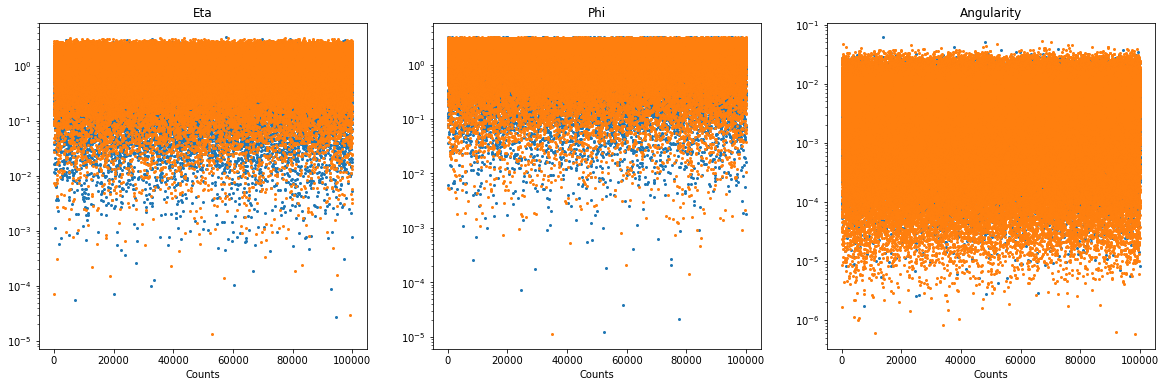

In [23]:
bins = 120; alph = .2 
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (20, 6))
ax.plot(higgs_data['eta'], 'o', lw=1, ms=2)
ax.plot(qcd_background_data['eta'], 'o', lw=1, ms=2)
ax.set_title('Eta'); 
ax.set_xlabel('Counts')
ax.set_yscale('log')


ax1.plot(higgs_data['phi'], 'o', lw=1, ms=2)
ax1.plot(qcd_background_data['phi'], 'o', lw=1, ms=2)
ax1.set_title('Phi')
ax1.set_xlabel('Counts')
ax1.set_yscale('log')


ax2.plot(higgs_data['angularity'], 'o', lw=1, ms=2)
ax2.plot(qcd_background_data['angularity'], 'o', lw=1, ms=2)
ax2.set_title('Angularity')
ax2.set_xlabel('Counts')
ax2.set_yscale('log')


Text(0, 0.5, 'Log(results)')

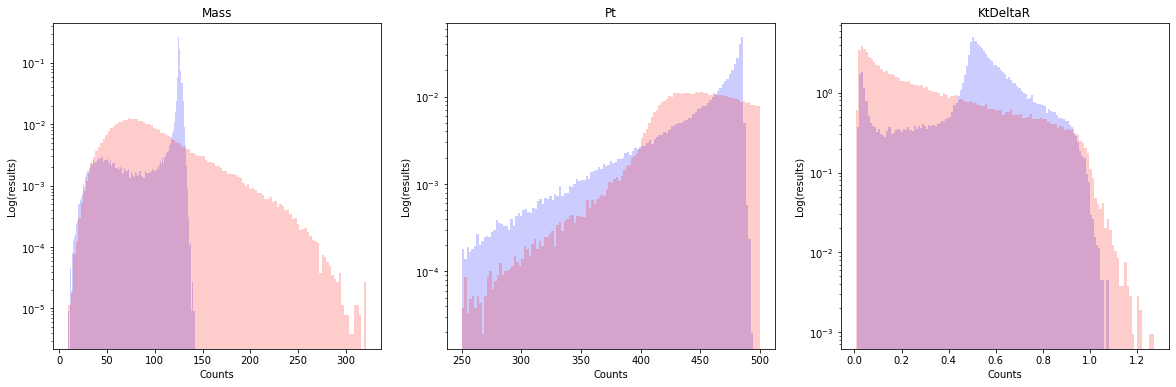

In [24]:
bins = 120; alph = .2 
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (20, 6))
ax.hist(higgs_data['mass'], bins, alpha = alph, density = True, color='b')
ax.hist(qcd_background_data['mass'], bins, alpha = alph, density = True, color='r')
ax.set_yscale('log')
ax.set_title('Mass'); 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(results)')

ax1.hist(higgs_data['pt'], bins, alpha = alph, density = True, color='b')
ax1.hist(qcd_background_data['pt'], bins, alpha = alph, density = True, color='r')
ax1.set_yscale('log')
ax1.set_title('Pt')
ax1.set_xlabel('Counts')
ax1.set_ylabel('Log(results)')

ax2.hist(higgs_data['KtDeltaR'], bins, alpha = alph, density = True, color='b')
ax2.hist(qcd_background_data['KtDeltaR'], bins, alpha = alph, density = True, color='r')
ax2.set_yscale('log')
ax2.set_title('KtDeltaR')
ax2.set_xlabel('Counts')
ax2.set_ylabel('Log(results)')

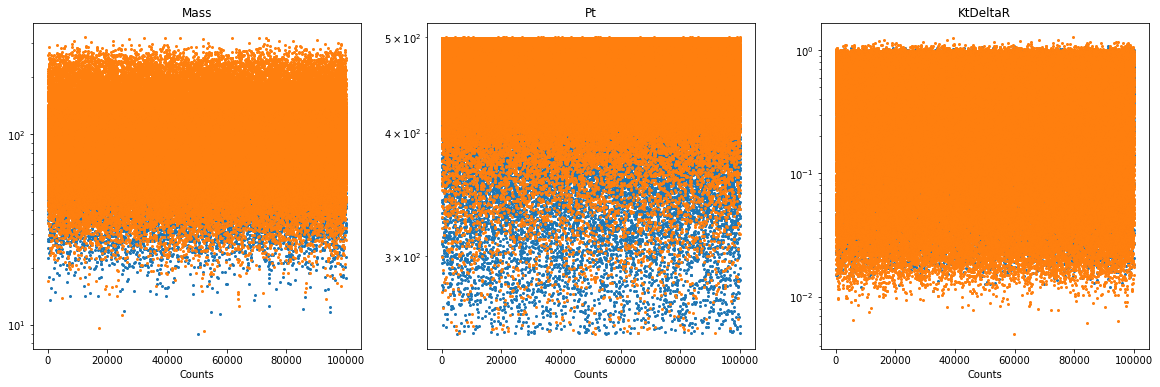

In [25]:
bins = 120; alph = .2 
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (20, 6))
ax.plot(higgs_data['mass'], 'o', lw=1, ms=2)
ax.plot(qcd_background_data['mass'], 'o', lw=1, ms=2)
ax.set_title('Mass'); 
ax.set_xlabel('Counts')
ax.set_yscale('log')


ax1.plot(higgs_data['pt'], 'o', lw=1, ms=2)
ax1.plot(qcd_background_data['pt'], 'o', lw=1, ms=2)
ax1.set_title('Pt')
ax1.set_xlabel('Counts')
ax1.set_yscale('log')


ax2.plot(higgs_data['KtDeltaR'], 'o', lw=1, ms=2)
ax2.plot(qcd_background_data['KtDeltaR'], 'o', lw=1, ms=2)
ax2.set_title('KtDeltaR')
ax2.set_xlabel('Counts')
ax2.set_yscale('log')


(0.0, 0.1)

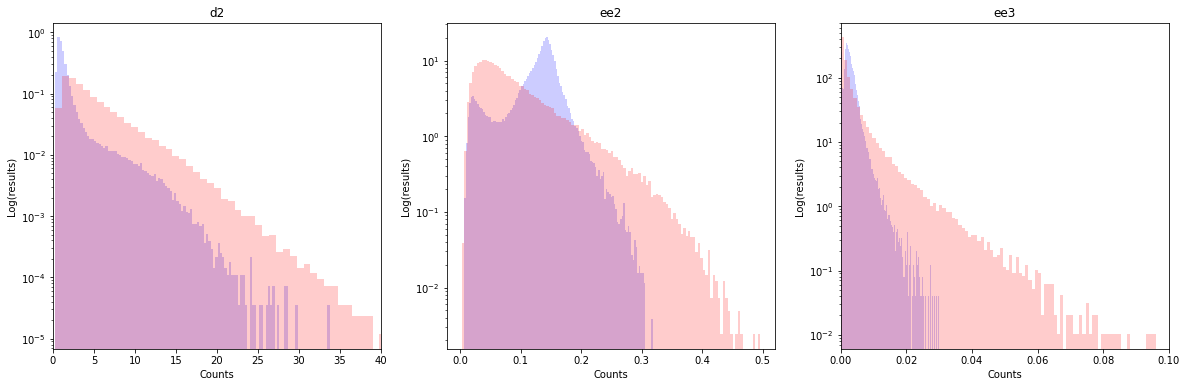

In [29]:
bins = 120; alph = .2 
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (20, 6))
ax.hist(higgs_data['d2'], bins, alpha = alph, density = True, color='b')
ax.hist(qcd_background_data['d2'], bins, alpha = alph, density = True, color='r')
ax.set_yscale('log')
ax.set_title('d2'); 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(results)')
ax.set_xlim([0,40])

ax1.hist(higgs_data['ee2'], bins, alpha = alph, density = True, color='b')
ax1.hist(qcd_background_data['ee2'], bins, alpha = alph, density = True, color='r')
ax1.set_yscale('log')
ax1.set_title('ee2')
ax1.set_xlabel('Counts')
ax1.set_ylabel('Log(results)')

ax2.hist(higgs_data['ee3'], bins, alpha = alph, density = True, color='b')
ax2.hist(qcd_background_data['ee3'], bins, alpha = alph, density = True, color='r')
ax2.set_yscale('log')
ax2.set_title('ee3')
ax2.set_xlabel('Counts')
ax2.set_ylabel('Log(results)')
ax2.set_xlim([0,.1])

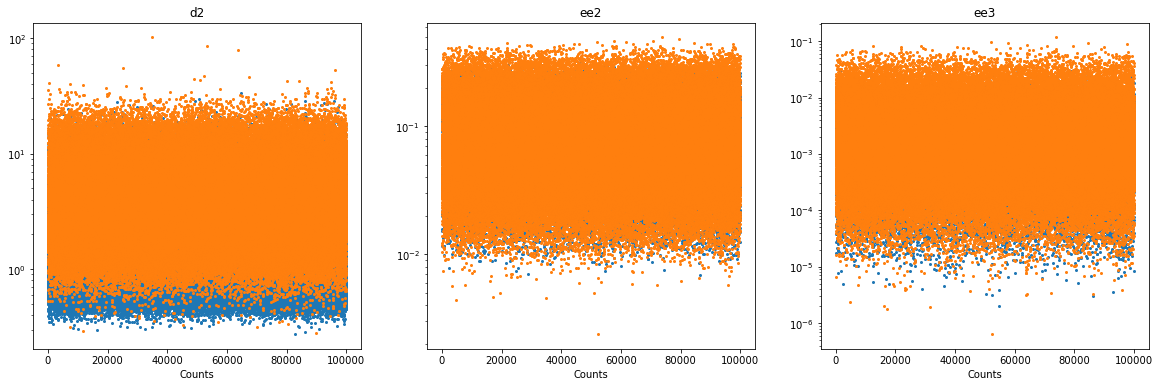

In [30]:
bins = 120; alph = .2 
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (20, 6))
ax.plot(higgs_data['d2'], 'o', lw=1, ms=2)
ax.plot(qcd_background_data['d2'], 'o', lw=1, ms=2)
ax.set_title('d2'); 
ax.set_xlabel('Counts')
ax.set_yscale('log')

ax1.plot(higgs_data['ee2'], 'o', lw=1, ms=2)
ax1.plot(qcd_background_data['ee2'], 'o', lw=1, ms=2)
ax1.set_title('ee2')
ax1.set_xlabel('Counts')
ax1.set_yscale('log')


ax2.plot(higgs_data['ee3'], 'o', lw=1, ms=2)
ax2.plot(qcd_background_data['ee3'], 'o', lw=1, ms=2)
ax2.set_title('ee3')
ax2.set_xlabel('Counts')
ax2.set_yscale('log')


Text(0, 0.5, 'Log(results)')

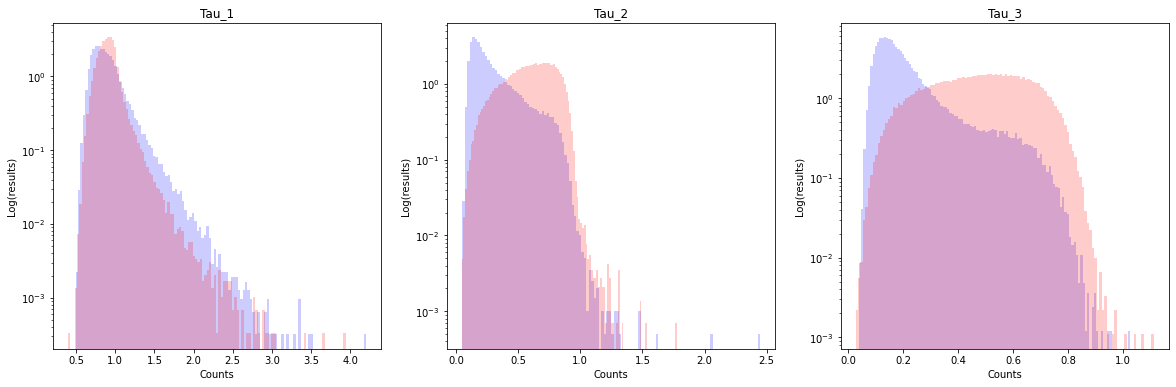

In [31]:
bins = 120; alph = .2 
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (20, 6))
ax.hist(higgs_data['t1'], bins, alpha = alph, density = True, color='b')
ax.hist(qcd_background_data['t1'], bins, alpha = alph, density = True, color='r')
ax.set_yscale('log')
ax.set_title('Tau_1'); 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(results)')

ax1.hist(higgs_data['t2'], bins, alpha = alph, density = True, color='b')
ax1.hist(qcd_background_data['t2'], bins, alpha = alph, density = True, color='r')
ax1.set_yscale('log')
ax1.set_title('Tau_2')
ax1.set_xlabel('Counts')
ax1.set_ylabel('Log(results)')

ax2.hist(higgs_data['t3'], bins, alpha = alph, density = True, color='b')
ax2.hist(qcd_background_data['t3'], bins, alpha = alph, density = True, color='r')
ax2.set_yscale('log')
ax2.set_title('Tau_3')
ax2.set_xlabel('Counts')
ax2.set_ylabel('Log(results)')

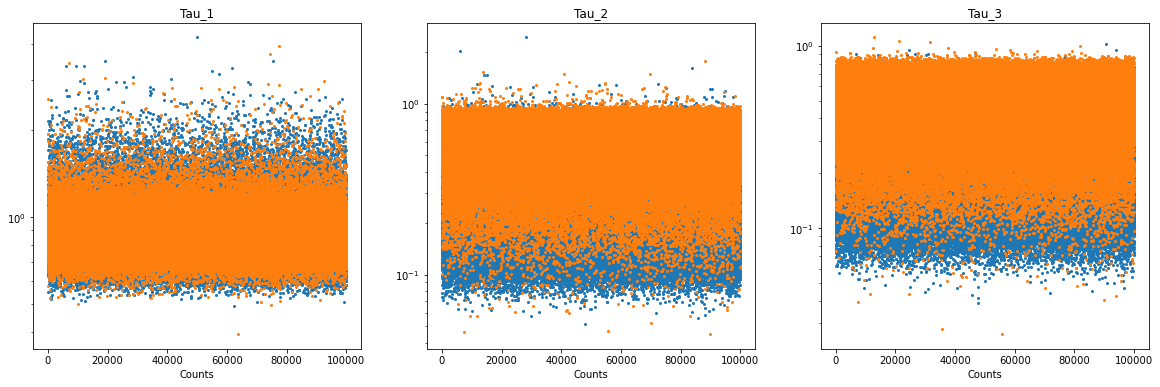

In [32]:
bins = 120; alph = .2 
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (20, 6))
ax.plot(higgs_data['t1'], 'o', lw=1, ms=2)
ax.plot(qcd_background_data['t1'], 'o', lw=1, ms=2)
ax.set_title('Tau_1'); 
ax.set_xlabel('Counts')
ax.set_yscale('log')

ax1.plot(higgs_data['t2'], 'o', lw=1, ms=2)
ax1.plot(qcd_background_data['t2'], 'o', lw=1, ms=2)
ax1.set_title('Tau_2')
ax1.set_xlabel('Counts')
ax1.set_yscale('log')

ax2.plot(higgs_data['t3'], 'o', lw=1, ms=2)
ax2.plot(qcd_background_data['t3'], 'o', lw=1, ms=2)
ax2.set_title('Tau_3')
ax2.set_xlabel('Counts')
ax2.set_yscale('log')

Text(0, 0.5, 'Log(results)')

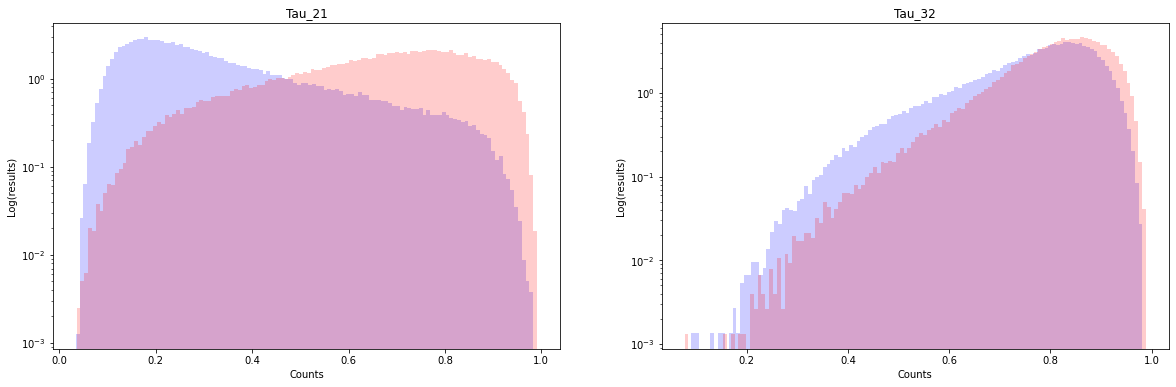

In [33]:
bins = 120; alph = .2 
fig, (ax, ax1) = plt.subplots(1, 2, figsize = (20, 6))
ax.hist(higgs_data['t21'], bins, alpha = alph, density = True, color='b')
ax.hist(qcd_background_data['t21'], bins, alpha = alph, density = True, color='r')
ax.set_yscale('log')
ax.set_title('Tau_21'); 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(results)')

ax1.hist(higgs_data['t32'], bins, alpha = alph, density = True, color='b')
ax1.hist(qcd_background_data['t32'], bins, alpha = alph, density = True, color='r')
ax1.set_yscale('log')
ax1.set_title('Tau_32')
ax1.set_xlabel('Counts')
ax1.set_ylabel('Log(results)')

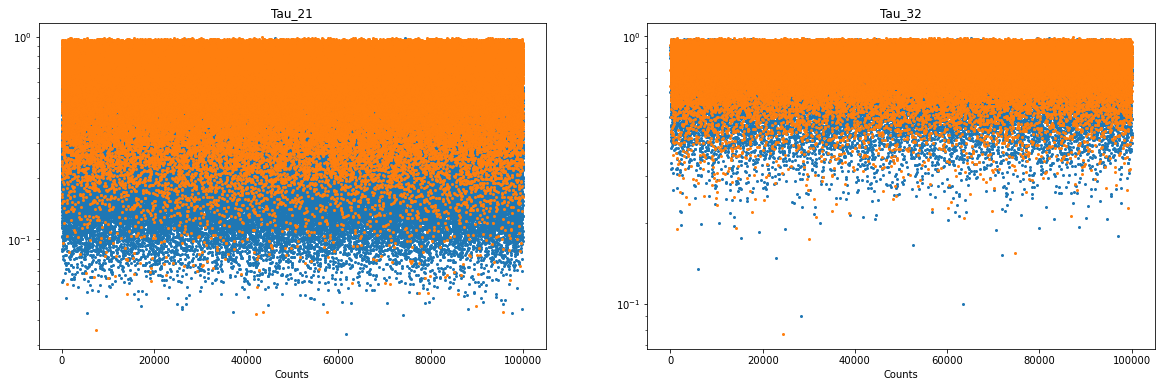

In [34]:
bins = 120; alph = .2 
fig, (ax, ax1) = plt.subplots(1, 2, figsize = (20, 6))
ax.plot(higgs_data['t21'], 'o', lw=1, ms=2)
ax.plot(qcd_background_data['t21'], 'o', lw=1, ms=2)
ax.set_title('Tau_21'); 
ax.set_xlabel('Counts')
ax.set_yscale('log')

ax1.plot(higgs_data['t32'], 'o', lw=1, ms=2)
ax1.plot(qcd_background_data['t32'], 'o', lw=1, ms=2)
ax1.set_title('Tau_32')
ax1.set_xlabel('Counts')
ax1.set_yscale('log')

Going to describe some 2d hist plots to understand if there is any varying relationship between meta-data

Text(0, 0.5, 'mass')

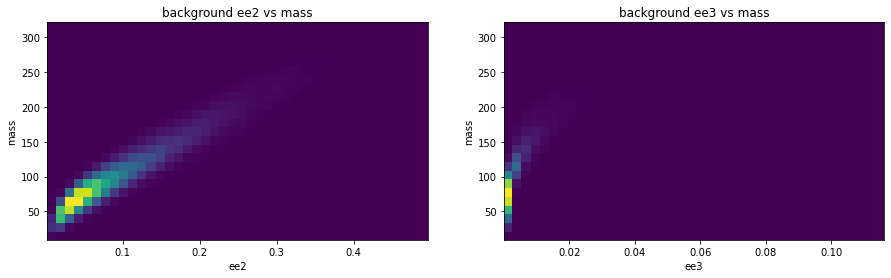

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist2d(qcd_background_data['ee2'], qcd_background_data['mass'], bins = [42, 25])
ax1.set_title("background ee2 vs mass")
ax1.set_xlabel('ee2')
ax1.set_ylabel('mass')

ax2.hist2d(qcd_background_data['ee3'], qcd_background_data['mass'], bins = [42, 25])
ax2.set_title("background ee3 vs mass")
ax2.set_xlabel('ee3')
ax2.set_ylabel('mass')

Text(0, 0.5, 'mass')

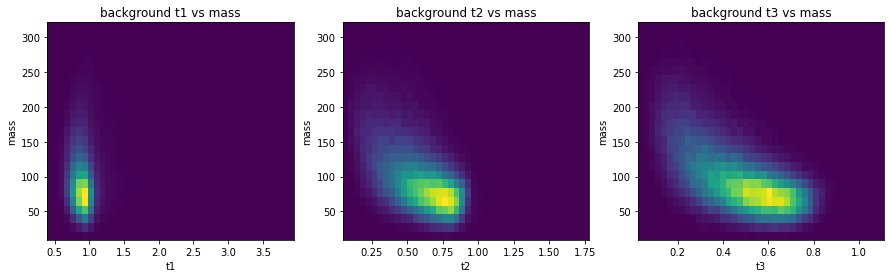

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))

ax1.hist2d(qcd_background_data['t1'], qcd_background_data['mass'], bins = [42, 25])
ax1.set_title("background t1 vs mass")
ax1.set_xlabel('t1')
ax1.set_ylabel('mass')


ax2.hist2d(qcd_background_data['t2'], qcd_background_data['mass'], bins = [42, 25])
ax2.set_title("background t2 vs mass")
ax2.set_xlabel('t2')
ax2.set_ylabel('mass')

ax3.hist2d(qcd_background_data['t3'], qcd_background_data['mass'], bins = [42, 25])
ax3.set_title("background t3 vs mass")
ax3.set_xlabel('t3')
ax3.set_ylabel('mass')

Text(0, 0.5, 't1')

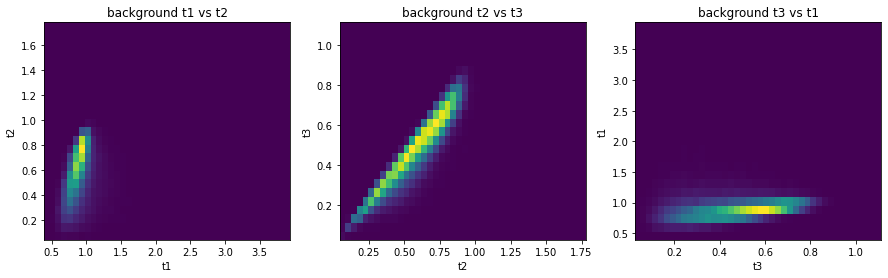

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))

ax1.hist2d(qcd_background_data['t1'], qcd_background_data['t2'], bins = [42, 25])
ax1.set_title("background t1 vs t2")
ax1.set_xlabel('t1')
ax1.set_ylabel('t2')

ax2.hist2d(qcd_background_data['t2'], qcd_background_data['t3'], bins = [42, 25])
ax2.set_title("background t2 vs t3")
ax2.set_xlabel('t2')
ax2.set_ylabel('t3')

ax3.hist2d(qcd_background_data['t3'], qcd_background_data['t1'], bins = [42, 25])
ax3.set_title("background t3 vs t1")
ax3.set_xlabel('t3')
ax3.set_ylabel('t1')

Text(0, 0.5, 'ee3')

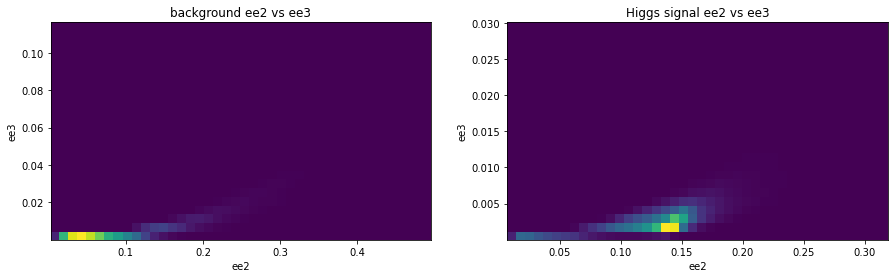

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist2d(qcd_background_data['ee2'], qcd_background_data['ee3'], bins = [42, 25])
ax1.set_title("background ee2 vs ee3")
ax1.set_xlabel('ee2')
ax1.set_ylabel('ee3')


ax2.hist2d(higgs_data['ee2'], higgs_data['ee3'], bins = [42, 25])
ax2.set_title("Higgs signal ee2 vs ee3")
ax2.set_xlabel('ee2')
ax2.set_ylabel('ee3')